GAN
  - 적대적 생성 신경망 : 두개의 모델이 서로 경쟁하는 구조
    - Generator : 생성모델 - 진짜에 가까운 가짜를 생성
    - Discriminator : 판별모델 - 진짜인지 가짜인지 구분
  - 목표 : 실제데이터의 분포에 가까운 데이터를 생성    

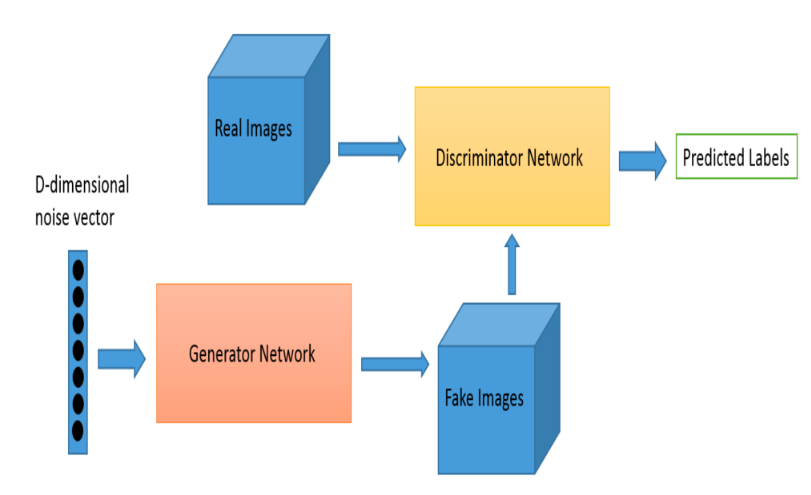

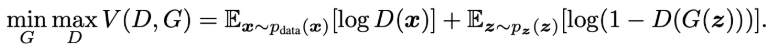

In [ ]:
# D(X) = 1에 가깝고 가짜데이터에 대해서 D(G(z)) = 0에 가깝도록 학습

In [ ]:
# D(x) : x가 진짜 데이터일 확률
# G(z) : 생성한 데이터
# pdata : 실제 데이터의 분포
# pz : 노이즈(랜덤 입력)의 분포

In [2]:
# D(G(z))값을 높도록 ,그리고 전체 확률값이 낮아지도록 학습
# 두개를 동시에 학습하는게 아니라
# 하나의 네트워크를 고정시키고 다른 한 네트워크를 업데이트하는 방식으로 따로따로 업데이트
# GAN의 목표는 최대 최소문제를 해결

Loss Function(판별자 손실)

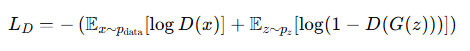

In [3]:
# 이 값이 작아지도록 학습

Loss Functino(생성자 손실)


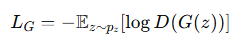

In [4]:
# 가짜데이터 D(G(z))를 1에 가깝게 만듦

한계점
  - 고해상도 이미지를 생성할 수 없다, 학습이 불안정하다는 점
    - 극복하기 위해서 DCGAN, SRGAN, CycleGAN등의 GAN 모델이 개발

tensorflow 학습사이트

https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko&_gl=1*iqmpgu*_up*MQ..*_ga*ODIxMjA0MTYxLjE3MzcxMTM1NjY.*_ga_W0YLR4190T*MTczNzExMzU2NS4xLjAuMTczNzExMzU2NS4wLjAuMA..

캐글데이터셋

https://www.kaggle.com/datasets/elibooklover/victorian400?resource=download

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elibooklover/victorian400")

print("Path to dataset files:", path)

100%|██████████| 484M/484M [00:09<00:00, 55.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5


In [6]:
from glob import glob
paths = glob(path + '/**')

['/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/resized',
 '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/README.txt',
 '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/gray',
 '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/original']

In [8]:
# 데이터셋 확인
import os
import matplotlib.pyplot as plt
import cv2

In [9]:
origin_dir = '/original/'
resize_dir = '/resized/'
gray_dir = '/gray/'
print(f'number of original foler { len(os.listdir(path+origin_dir))}')
print(f'number of resize foler { len(os.listdir(path+resize_dir))}')
print(f'number of gray foler { len(os.listdir(path+gray_dir))}')

number of original foler 400
number of resize foler 400
number of gray foler 400


In [12]:
# 이미지 시각화
origin_files =  sorted(glob(path+origin_dir+'*'))
resize_fies = sorted(glob(path+resize_dir+'*'))
gray_files = sorted(glob(path+gray_dir+'*'))
print(origin_files[:2])
print(resize_fies[:2])
print(gray_files[:2])

['/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/original/Victorian1.png', '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/original/Victorian10.png']
['/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/resized/Victorian1.png', '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/resized/Victorian10.png']
['/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/gray/Victorian1.png', '/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/gray/Victorian10.png']


In [13]:
# cv2 모듈을 이용해서 이미지를 읽어
def read_img(file_path):
  img_arr = cv2.imread(file_path)
  return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/original/Victorian1.png
(714, 750, 3)


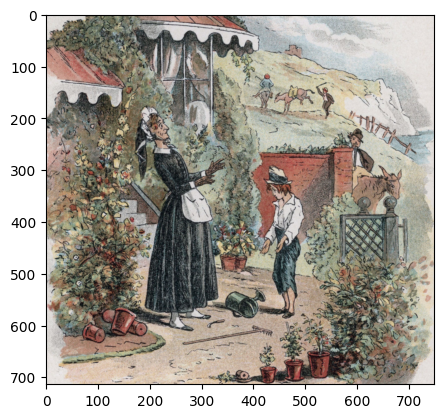

In [15]:
img_arr = read_img(origin_files[0])
print(origin_files[0])
print(img_arr.shape)
plt.imshow(img_arr)
plt.show()

/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/resized/Victorian1.png
(256, 256, 3)


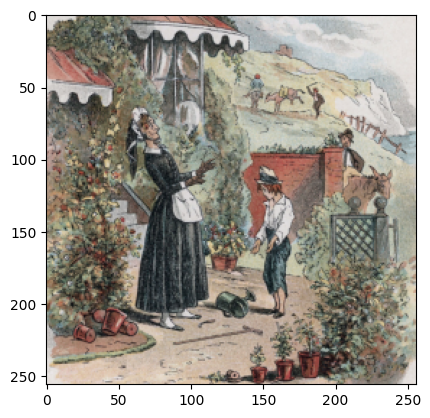

In [16]:
img_arr = read_img(resize_fies[0])
print(resize_fies[0])
print(img_arr.shape)
plt.imshow(img_arr)
plt.show()

/root/.cache/kagglehub/datasets/elibooklover/victorian400/versions/5/gray/Victorian1.png
(256, 256, 3)


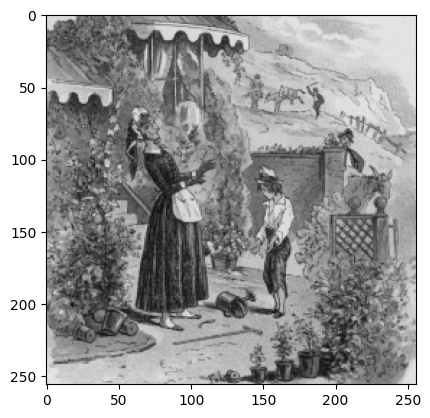

In [17]:
img_arr = read_img(gray_files[0])
print(gray_files[0])
print(img_arr.shape)
plt.imshow(img_arr)
plt.show()

In [ ]:
# 이미지전처리 : 정규화
import numpy as np
def get_mean_and_std(files):
  # mean
  global_mean = 0
  global_std = 0
  for img in files:
    img_arr = read_img(img) / 255
    global_mean += img_arr.reshape(-1,3).mean(axis=0)
  global_mean /= len(files)
  # std
  for img in files:
    img_arr = read_img(img) / 255
    global_var += ((img_arr.reshape(-1,3)- global_mean)**2).mean(axis=0)
  global_var /= len(files)
  global_std = np.sqrt(global_var)
  return global_mean, global_std